In [48]:
# cell 1: import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set up visualization style
sns.set_theme(style="whitegrid")


In [49]:
# cell 2: load datasets
# load ratings data
ratings = pd.read_csv('../data/u.data', sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'])

# load movies data
column_names_no_genres = ['movieId', 'title', 'release_date', 'video_release_date', 'IMDb_URL']
column_names_genres = [f'genre_{i}' for i in range(19)]
column_names = column_names_no_genres + column_names_genres
movies = pd.read_csv('../data/u.item', sep='|', encoding='ISO-8859-1', names=column_names)

# create 'genres' column
genre_columns = movies.columns[5:]
movies['genres'] = movies[genre_columns].apply(lambda x: '|'.join(genre_columns[x == 1].str.replace('genre_', '')), axis=1)

# drop individual genre columns
movies = movies.drop(columns=genre_columns)

# preview the datasets
print(ratings.head())
print(movies.head())

   userId  movieId  rating  timestamp
0     196      242       3  881250949
1     186      302       3  891717742
2      22      377       1  878887116
3     244       51       2  880606923
4     166      346       1  886397596
   movieId              title release_date  video_release_date  \
0        1   Toy Story (1995)  01-Jan-1995                 NaN   
1        2   GoldenEye (1995)  01-Jan-1995                 NaN   
2        3  Four Rooms (1995)  01-Jan-1995                 NaN   
3        4  Get Shorty (1995)  01-Jan-1995                 NaN   
4        5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  genres  
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...   3|4|5  
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...  1|2|16  
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...      16  
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...   1|5|8  
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)  6|8|16

In [50]:
# cell 3: check for missing values
print("Missing values in ratings data:")
print(ratings.isnull().sum())

print("Missing values in movies data:")
print(movies.isnull().sum())

Missing values in ratings data:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Missing values in movies data:
movieId                  0
title                    0
release_date             1
video_release_date    1682
IMDb_URL                 3
genres                   0
dtype: int64


In [51]:

# cell 4: check for duplicates in data
print("Duplicates in ratings data:", ratings.duplicated().sum())
print("Duplicates in movies data:", movies.duplicated().sum())

Duplicates in ratings data: 0
Duplicates in movies data: 0


In [52]:
# cell 5: convert timestamp columns to readable datetime format
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# preview updated ratings data
print(ratings['timestamp'].head())

0   1997-12-04 15:55:49
1   1998-04-04 19:22:22
2   1997-11-07 07:18:36
3   1997-11-27 05:02:03
4   1998-02-02 05:33:16
Name: timestamp, dtype: datetime64[ns]


In [53]:
# cell 6: verify data types
print(ratings.dtypes)
print(movies.dtypes)

userId                int64
movieId               int64
rating                int64
timestamp    datetime64[ns]
dtype: object
movieId                 int64
title                  object
release_date           object
video_release_date    float64
IMDb_URL               object
genres                 object
dtype: object


# Exploratory Data Analysis (EDA) on MovieLens Dataset

In this section, I will perform exploratory data analysis on the MovieLens 100k dataset. We will:
- Analyze the distribution of movie ratings.
- Identify the most popular movies.
- Explore user behavior in terms of ratings.
- Analyze the distribution of movie genres.

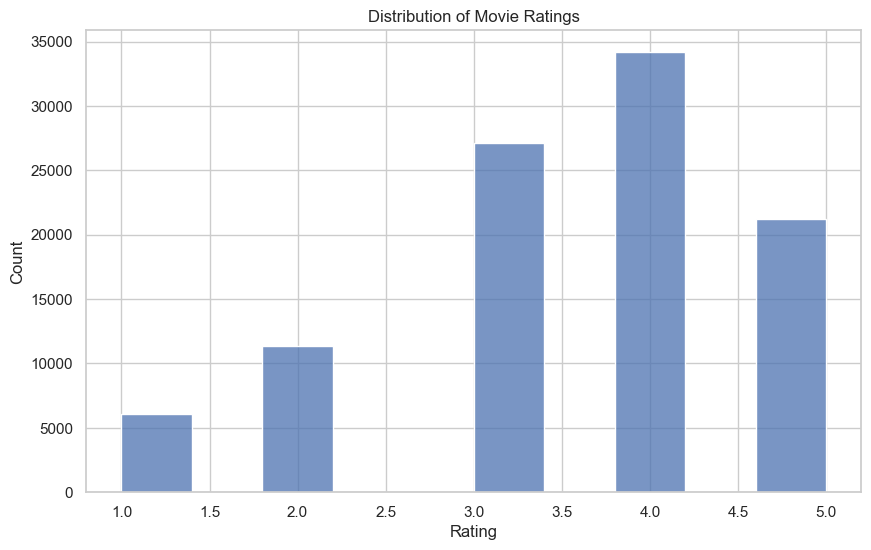

In [54]:
# Cell 7: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [55]:
# Cell 8: Most Popular Movies
movie_ratings_count = ratings.groupby('movieId').size().sort_values(ascending=False)
top_movies = movie_ratings_count.head(10)

top_movies_data = movies[movies['movieId'].isin(top_movies.index)]
print(top_movies_data[['movieId', 'title']])

     movieId                          title
0          1               Toy Story (1995)
49        50               Star Wars (1977)
99       100                   Fargo (1996)
120      121  Independence Day (ID4) (1996)
180      181      Return of the Jedi (1983)
257      258                 Contact (1997)
285      286    English Patient, The (1996)
287      288                  Scream (1996)
293      294               Liar Liar (1997)
299      300           Air Force One (1997)


In [56]:
# Cell 9: Merge Ratings with Movie Titles
merged_df = ratings.merge(movies, on='movieId')
print(merged_df.head())

   userId  movieId  rating           timestamp                       title  \
0     196      242       3 1997-12-04 15:55:49                Kolya (1996)   
1     186      302       3 1998-04-04 19:22:22    L.A. Confidential (1997)   
2      22      377       1 1997-11-07 07:18:36         Heavyweights (1994)   
3     244       51       2 1997-11-27 05:02:03  Legends of the Fall (1994)   
4     166      346       1 1998-02-02 05:33:16         Jackie Brown (1997)   

  release_date  video_release_date  \
0  24-Jan-1997                 NaN   
1  01-Jan-1997                 NaN   
2  01-Jan-1994                 NaN   
3  01-Jan-1994                 NaN   
4  01-Jan-1997                 NaN   

                                            IMDb_URL      genres  
0    http://us.imdb.com/M/title-exact?Kolya%20(1996)           5  
1  http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...  6|10|13|16  
2  http://us.imdb.com/M/title-exact?Heavyweights%...         4|5  
3  http://us.imdb.com/M/title-exac

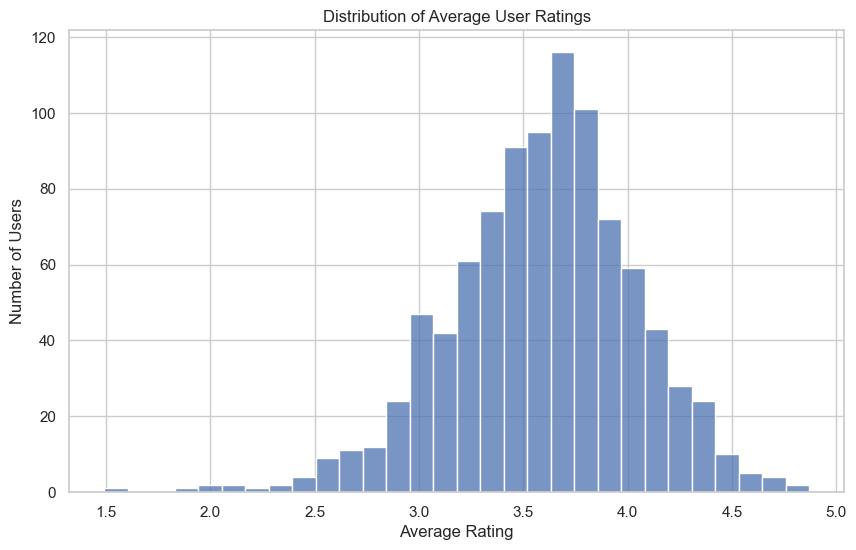

In [57]:
# Cell 10: Average Ratings by Users
user_avg_ratings = ratings.groupby('userId')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(user_avg_ratings, bins=30, kde=False)
plt.title('Distribution of Average User Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()

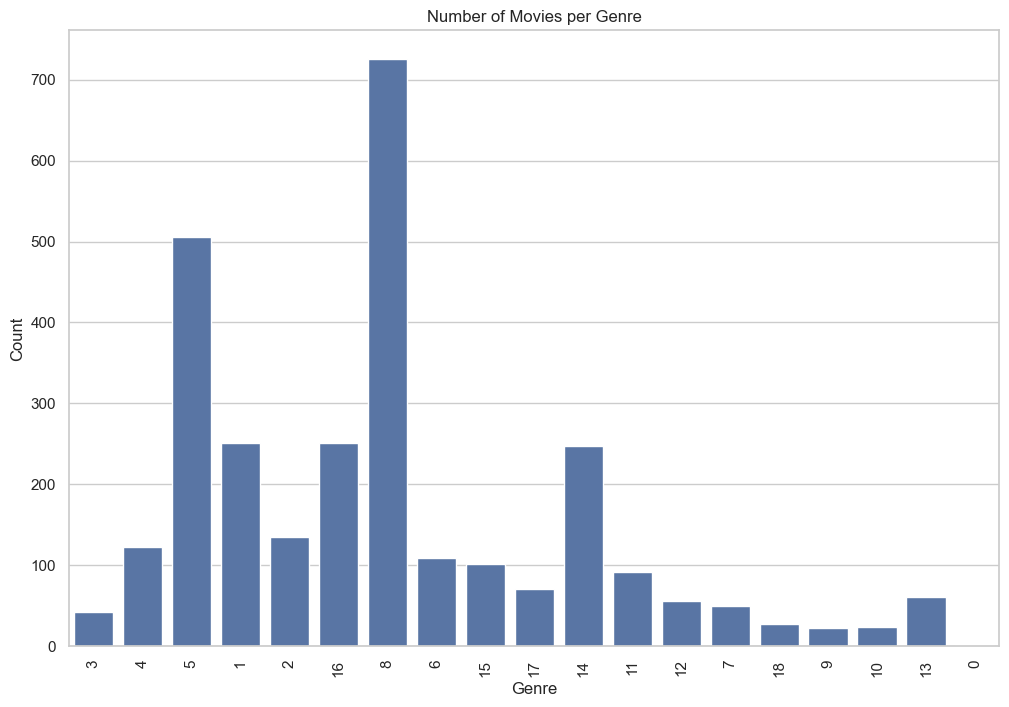

In [58]:
# Cell 11: Analyze Movie Genres
# split genres into a list of individual genres
movies['genres'] = movies['genres'].str.split('|')

# count number of movies per genre
from collections import Counter
genre_count = Counter([genre for sublist in movies['genres'] for genre in sublist if genre != ''])

# plot genres
plt.figure(figsize=(12, 8))
sns.barplot(x=list(genre_count.keys()), y=list(genre_count.values()))
plt.xticks(rotation=90)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()